In [1]:
import hdf5plugin
import h5py
import cupy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILENAME = "data/blc41_guppi_59103_01372_PSR_B2021+51_0009.rawspec.0000.h5"
f = h5py.File(FILENAME, "r")
data = f["data"]
data.shape

(16, 1, 67108864)

(16, 100)


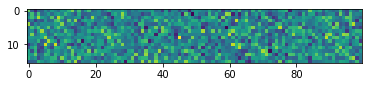

In [3]:
c = cupy.asarray(data[:, 0, :100])
print(c.shape)
plt.imshow(c.get())

In [4]:
def normalize(arr):
    amax = cupy.amax(arr).item()
    amin = cupy.amin(arr).item()
    print(f"normalizing to {amin} - {amax} range")
    return (arr - amin) / (amax - amin)
    
c = cupy.asarray(data[:, 0, :10_000_000])
norm = normalize(c)

normalizing to 7055.99169921875 - 5631764992.0 range


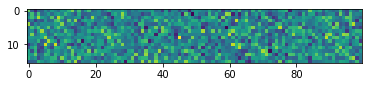

In [5]:
plt.imshow(norm[:, :100].get())

In [6]:
norm[0]

array([1.4508388e-06, 7.6750734e-07, 4.9640164e-07, ..., 3.0053391e-06,
       2.9103091e-06, 3.0839587e-06], dtype=float32)

In [7]:
inorm = (norm * 100).astype(int)
nz = cupy.nonzero(cupy.amax(inorm, axis=0))[0]
nz

array([ 524288, 1572864, 2621440, 3670016, 4718592, 5767168, 6815744,
       7864320, 8912896, 9961472])

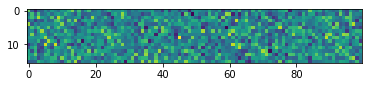

In [8]:
no_spikes = cupy.copy(c)
for i in nz:
    no_spikes[:, i] *= 0
plt.imshow(no_spikes[:, :100].get())

In [9]:
norm = normalize(no_spikes)

normalizing to 0.0 - 5335657.0 range


In [19]:
inorm = (norm * 100).astype(int)
locs = cupy.nonzero(cupy.amax(inorm, axis=0))[0]
locs

array([ 509003,  509004,  509005,  509006,  523598,  523723,  523724,
        523849,  523850,  523974,  523975,  524099,  524100,  524104,
        524105,  524221,  524222,  524223,  524224,  524225,  524226,
        524227,  524228,  524229,  524230,  524346,  524347,  524348,
        524349,  524350,  524351,  524352,  524353,  524354,  524355,
        524471,  524472,  524475,  524476,  524477,  524601,  524602,
        524726,  524727,  524852,  532382,  532390,  539814,  539815,
        539824,  539825,  539830,  539833,  541278,  541279,  541280,
        541281,  541282,  541283,  541284,  541286,  541287,  541288,
        541289,  541290,  541291,  541292, 4997696, 4998212, 4998213,
       5000595, 5000596, 5000597, 5000599, 5000600, 5000601, 5000602,
       5000603, 5000604, 5000605, 5000606, 5013820, 5013822, 5013823,
       5013824, 5013825, 5013826, 5013827, 5013828, 5013829, 5013831])

In [11]:
def show(center):
    plt.imshow(no_spikes[:, (center - 50):(center + 50)].get())

In [25]:
spaced = []
for loc in map(int, locs):
    if spaced and spaced[-1] + 1000 > loc:
        continue
    spaced.append(loc)
spaced

[509003, 523598, 524601, 532382, 539814, 541278, 4997696, 5000595, 5013820]